# EDA
---

### Notes about the EDA and results
---

### Initialization and data import

In [10]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date, time, timedelta


import sys
import os
sys.path.append(os.path.abspath(".."))

In [11]:
# Load data
df_wertheim_2024 = pd.read_parquet("../data/fueldata/wertheim_23-25.parquet")
#df_wertheim_2024 = pd.read_parquet("data/fueldata/fuerstenwalde_23-25.parquet")
#df_wertheim_2024 = pd.read_csv("data/fueldata/fuerstenwalde_2024.csv")

df_oil = pd.read_excel("../data/oildata/oil_EIA_1987-2025.xls","Data 1")

In [12]:
df_oil.tail(20)

,Back to Contents,Data 1: Europe Brent Spot Price FOB (Dollars per Barrel)
9628,2025-04-28 00:00:00,66.13
9629,2025-04-29 00:00:00,64.04
9630,2025-04-30 00:00:00,63.37
9631,2025-05-01 00:00:00,62.37
9632,2025-05-02 00:00:00,61.57
9633,2025-05-06 00:00:00,62.37
9634,2025-05-07 00:00:00,60.31
9635,2025-05-08 00:00:00,62.22
9636,2025-05-09 00:00:00,64.26
9637,2025-05-12 00:00:00,65.28


---
### Data Description

In [13]:
df_wertheim_2024.tail()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,name,brand,street,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json
116485,2025-05-25 21:09:18+02,bb61cff1-0d73-4189-847e-82b8599418d5,1.529,1.739,1.679,1,1,1,Esso Tankstelle,ESSO,BLAETTLEINSAECKER 1,,97877,WERTHEIM,49.771156,9.575148,2014-03-18 16:45:31+01,{}
116486,2025-05-25 21:16:23+02,fb0f8030-c1eb-4df1-9410-054eea7422ad,1.479,1.679,1.619,1,1,1,Aral Tankstelle,ARAL,Bestenheider Landstraße,70,97877,Wertheim,49.781710,9.504071,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":64,""period..."
116487,2025-05-25 23:01:57+02,fb0f8030-c1eb-4df1-9410-054eea7422ad,1.519,1.719,1.659,1,1,1,Aral Tankstelle,ARAL,Bestenheider Landstraße,70,97877,Wertheim,49.781710,9.504071,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":64,""period..."
116488,2025-05-25 23:06:02+02,bb61cff1-0d73-4189-847e-82b8599418d5,1.609,1.819,1.759,1,1,1,Esso Tankstelle,ESSO,BLAETTLEINSAECKER 1,,97877,WERTHEIM,49.771156,9.575148,2014-03-18 16:45:31+01,{}
116489,2025-05-25 23:36:30+02,e7a53db3-ebdf-4e07-9e53-ab5f19cf84e7,1.529,1.699,1.649,1,1,1,ZG Raiffeisen/Honeck-Waldschütz Tankstelle Wer...,ZG Raiffeisen Energie,Hafenstraße,12,97877,Wertheim-Bestenheid,49.781240,9.476310,2018-01-10 23:30:06+01,{}


In [14]:
print("Number of distinct gas stations:",df_wertheim_2024["name"].nunique())
print("Different gas stations:")
for gas in df_wertheim_2024["name"].unique():
    print (" - ",gas)

Number of distinct gas stations: 9
Different gas stations:
 -  TotalEnergies Truckstop Wertheim
 -  Esso Tankstelle
 -  Tankstelle Wertheim
 -  Berliner Ring
 -  Aral Tankstelle
 -  bft - Walther
 -  ZG Raiffeisen/Honeck-Waldschütz Tankstelle Wertheim
 -  Philipp Diehm GmbH
 -  Graf Wertheim 2


In [15]:
# Missing values
df_wertheim_2024.isna().sum()

date                 0
station_uuid         0
diesel               0
e5                   0
e10                  0
dieselchange         0
e5change             0
e10change            0
name                 0
brand                0
street               0
house_number         0
post_code            0
city                 0
latitude             0
longitude            0
first_active         0
openingtimes_json    0
dtype: int64

---
### Pre-Processing

In [16]:
# Make date variable numeric
df_wertheim_2024.dropna(inplace=True)
df_wertheim_2024["datetime"] = df_wertheim_2024["date"].apply(lambda x: datetime.strptime(x.split("+")[0], "%Y-%m-%d %H:%M:%S"))
df_wertheim_2024["datedate"] = df_wertheim_2024["datetime"].dt.date
df_wertheim_2024["hour"] = df_wertheim_2024["datetime"].dt.hour

In [17]:
# Oildata preparation
df_oil.columns = ["date","price"]
# Remove first two rows which include additional information
df_oil = df_oil.iloc[2:]
# Create datetime and oilprice variable
df_oil["datetime"] = pd.to_datetime(df_oil["date"], format='%Y-%m-%d')
df_oil["oilprice"] = df_oil["price"].astype(float)
df_oil.drop(["price","date"],axis=1,inplace=True)
df_oil.head()

,datetime,oilprice
2,1987-05-20,18.63
3,1987-05-21,18.45
4,1987-05-22,18.55
5,1987-05-25,18.60
6,1987-05-26,18.63


In [20]:
# Save oil dataset
df_oil.to_parquet("../data/oildata/oilprices.parquet")

---
### Visualizations

<Axes: xlabel='datetime', ylabel='e5'>

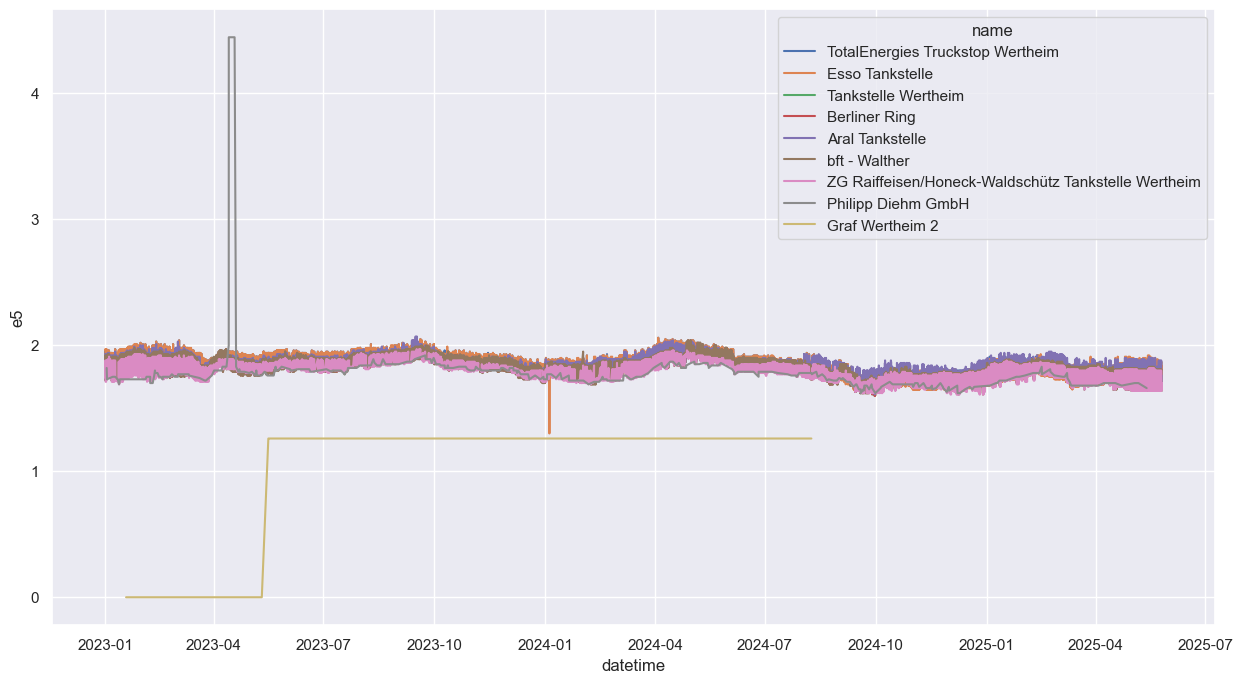

In [21]:
# Price change over the year by gas station
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datetime", y="e5", hue="name")

<Axes: xlabel='datedate', ylabel='e5'>

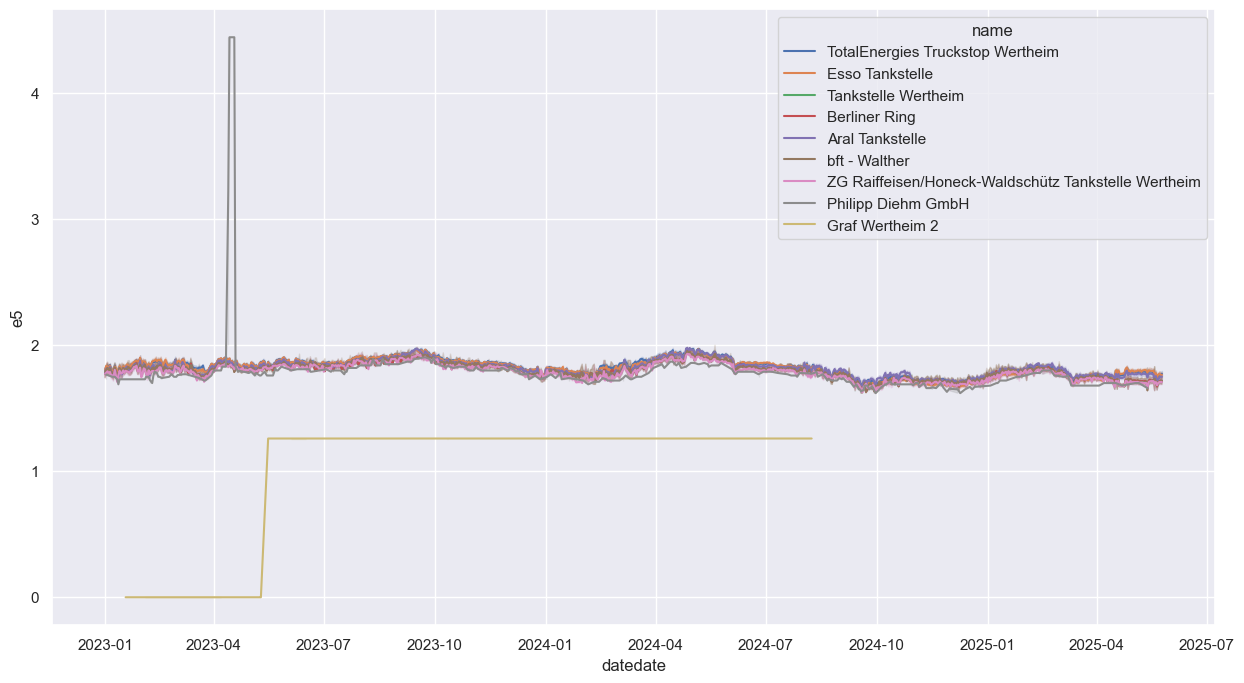

In [22]:
# Price change over the year by gas station and day
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5", hue="name")

<Axes: xlabel='datedate', ylabel='e5'>

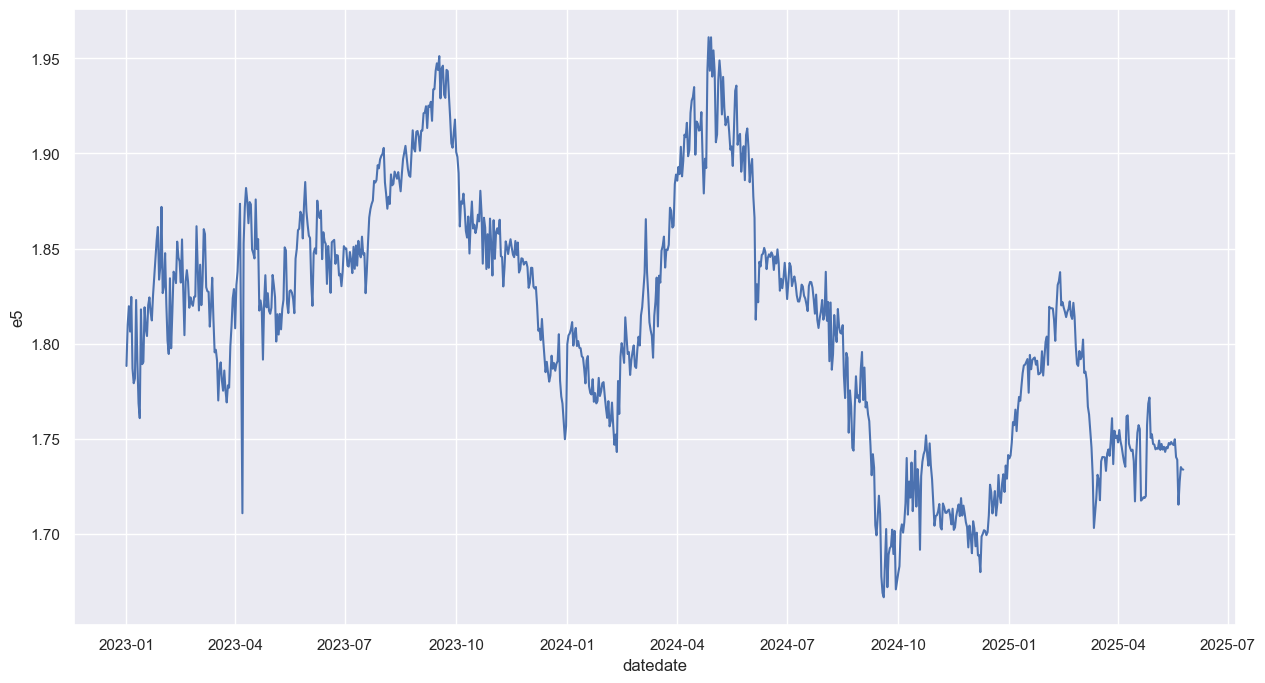

In [23]:
# Price change over the year by day
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5",errorbar=None)

(1.5, 2.0)

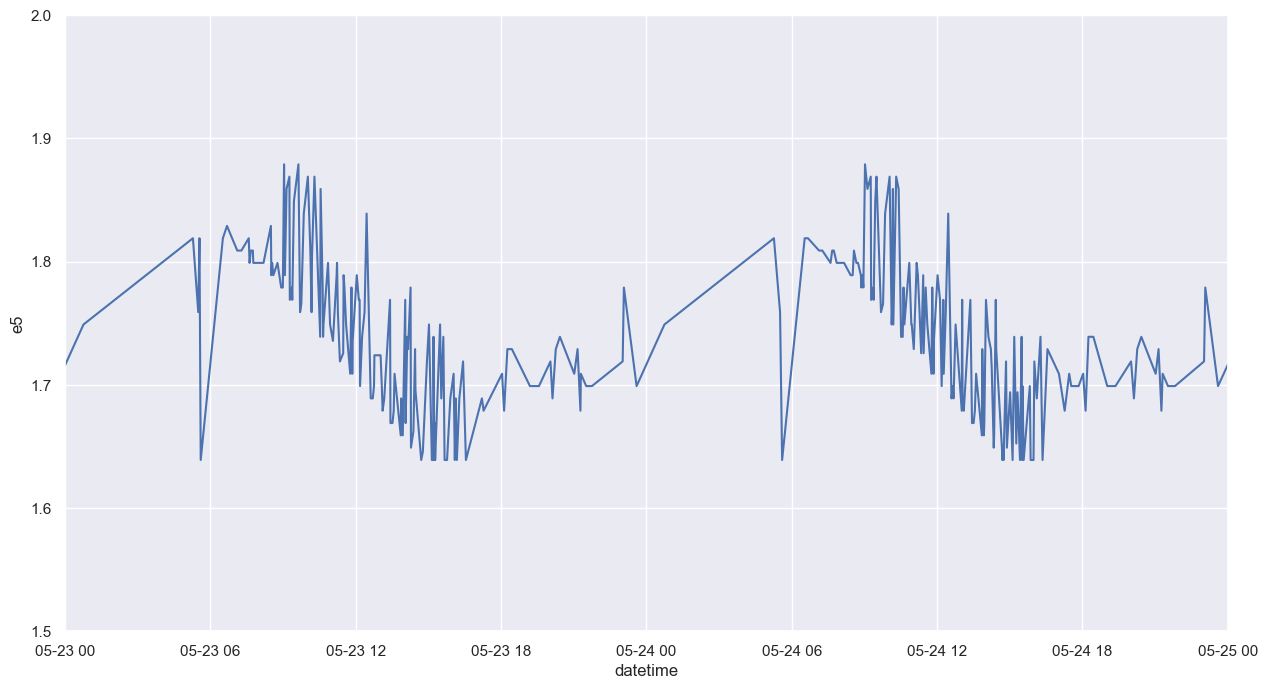

In [24]:
# Price change over the year by day
sns.set_theme(rc={'figure.figsize':(15,8)})
sns.lineplot(data=df_wertheim_2024, x="datetime", y="e5",errorbar=None)
plt.xlim((pd.to_datetime("2025-05-23"),pd.to_datetime("2025-05-25")))
plt.ylim((1.5,2))

<Axes: xlabel='datedate', ylabel='e5'>

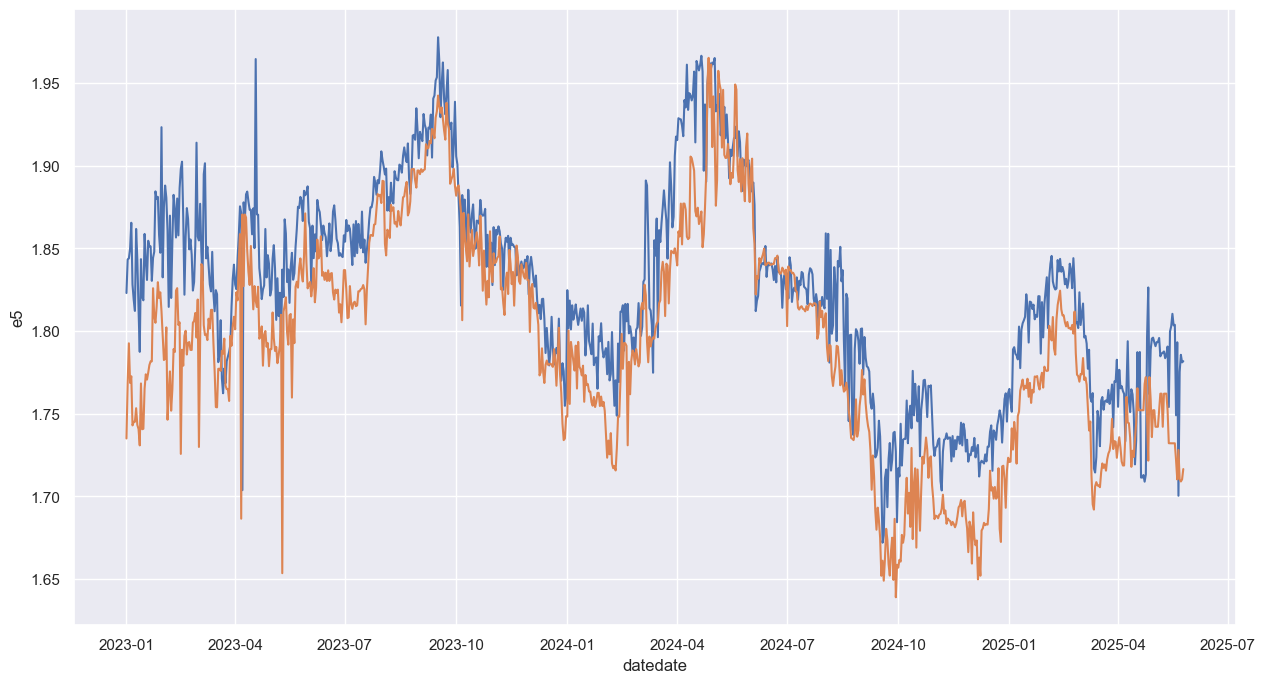

In [25]:
# Price over the day by hour
sns.lineplot(data=df_wertheim_2024[(6 <= df_wertheim_2024["hour"]) & (df_wertheim_2024["hour"] <= 11)], x="datedate", y="e5",errorbar=None)
sns.lineplot(data=df_wertheim_2024[(18 <= df_wertheim_2024["hour"]) & (df_wertheim_2024["hour"] <= 22)], x="datedate", y="e5",errorbar=None)

<Axes: xlabel='datedate', ylabel='e5'>

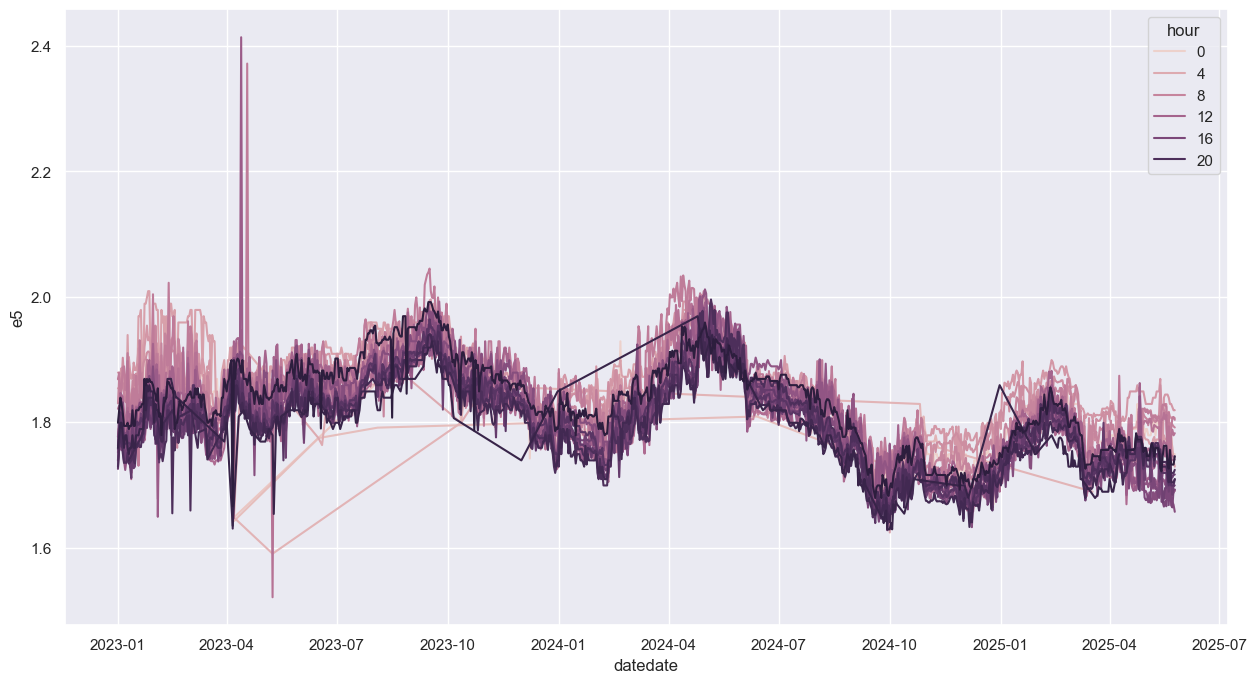

In [26]:
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5",errorbar=None,hue="hour")

(60.0, 100.0)

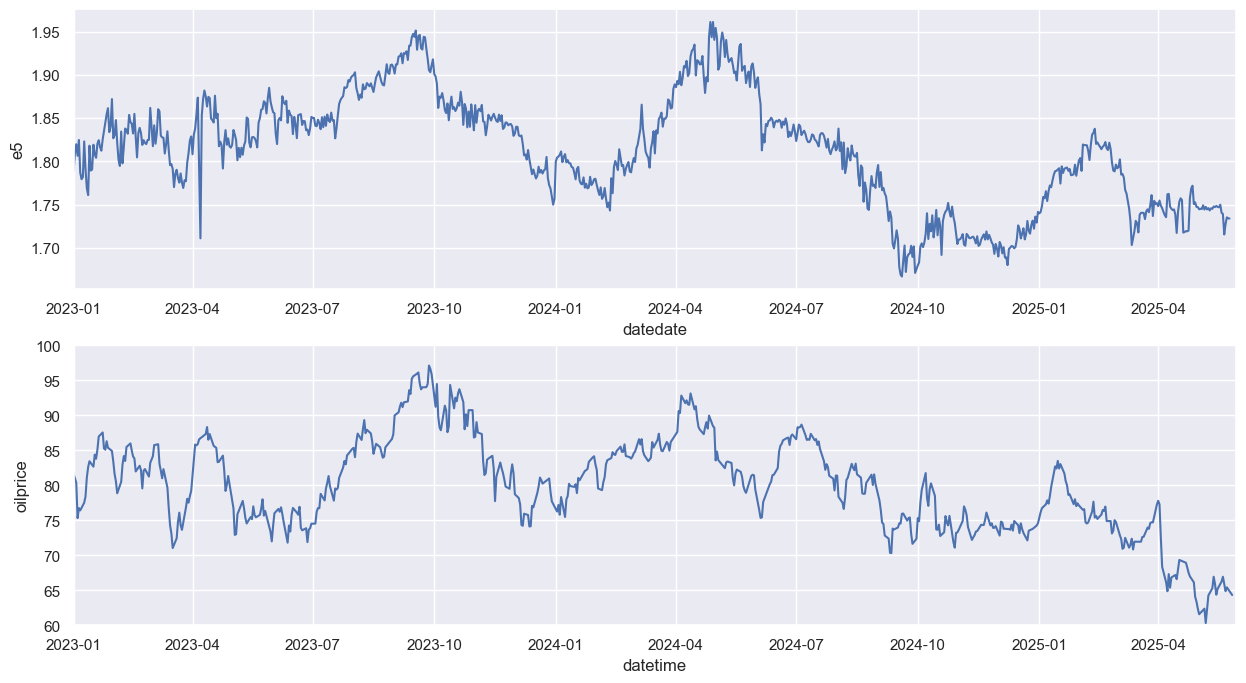

In [27]:
# Price change over the year by day
sns.set_theme(rc={'figure.figsize':(15,8)})
plt.subplot(2,1,1)
sns.lineplot(data=df_wertheim_2024, x="datedate", y="e5",errorbar=None)
plt.xlim(left=pd.to_datetime("2023-01-01"))
plt.xlim(right=pd.to_datetime("2025-05-30"))
plt.subplot(2,1,2)
sns.lineplot(data=df_oil, x="datetime", y="oilprice",errorbar=None)
plt.xlim(left=pd.to_datetime("2023-01-01"))
plt.xlim(right=pd.to_datetime("2025-05-30"))
plt.ylim((60,100))

In [28]:
from prophet import Prophet

model = Prophet(daily_seasonality=True, weekly_seasonality=True)
df_wertheim_2024.rename(columns={"datetime": "ds", "e5": "y"}, inplace=True)
model.fit(df_wertheim_2024)

/Users/nicoschreiber/Desktop/Neue_Fische/Python/FuelProphet/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
13:58:52 - cmdstanpy - INFO - Chain [1] start processing
13:59:50 - cmdstanpy - INFO - Chain [1] done processing


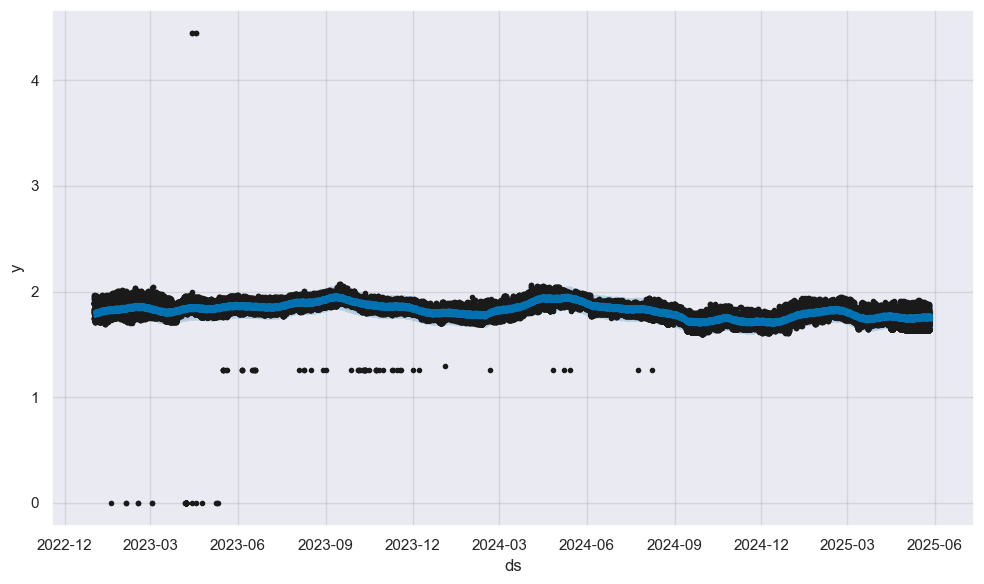

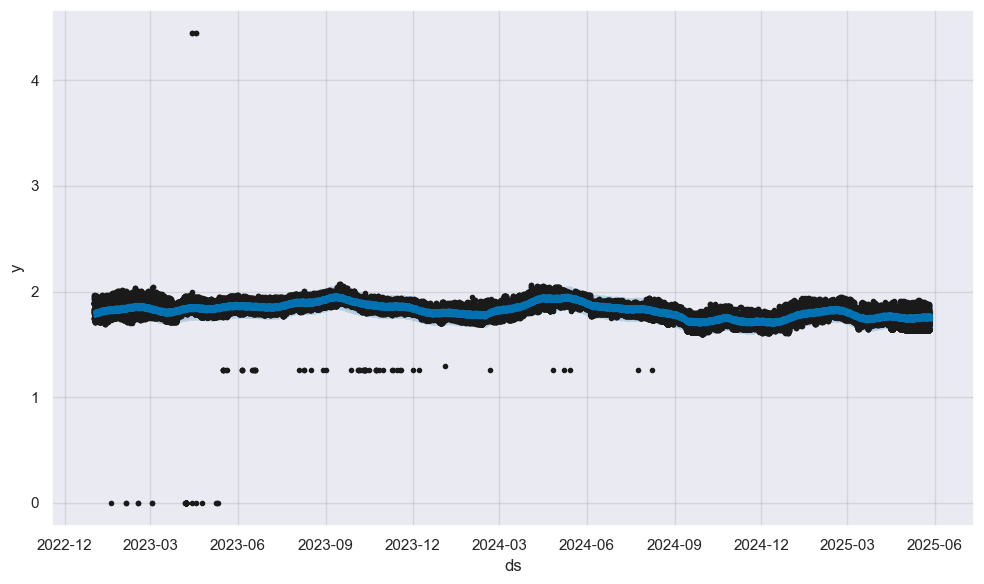

In [29]:
future = model.make_future_dataframe(periods=72, freq='H')
forecast = model.predict(future)

# Plot
model.plot(forecast)

<Axes: xlabel='ds', ylabel='yhat'>

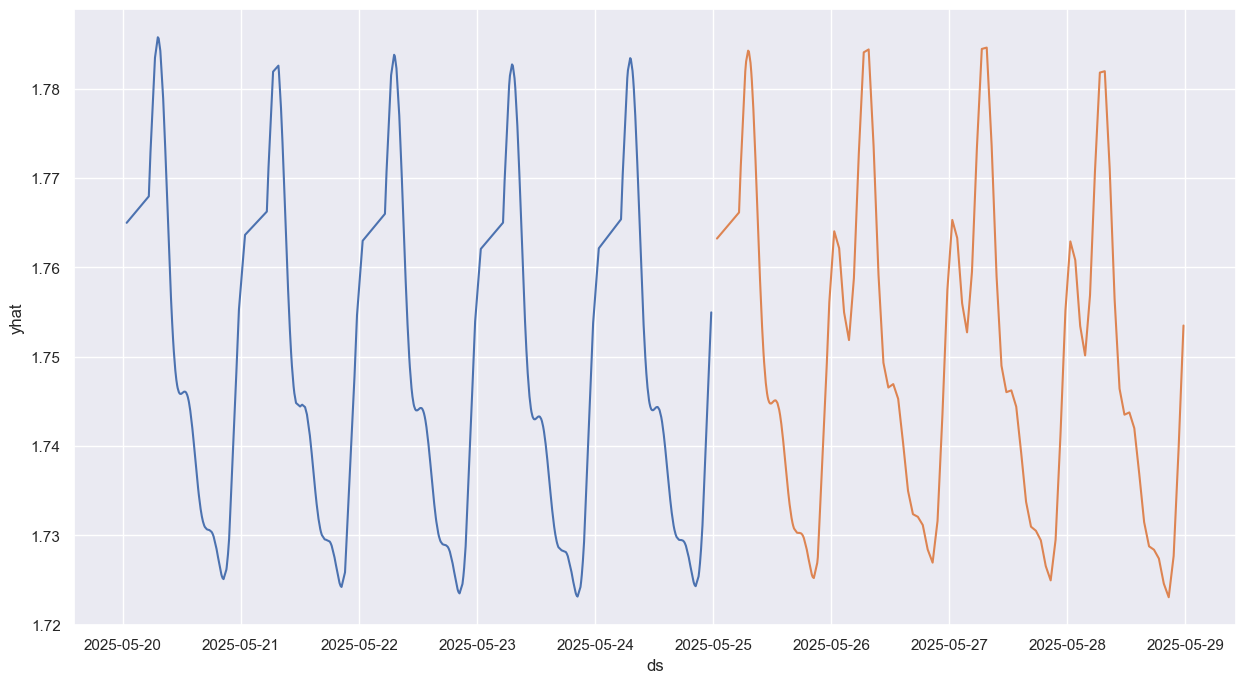

In [30]:
sns.lineplot(forecast[(forecast["ds"]>pd.to_datetime("2025-05-20")) & (forecast["ds"]<=pd.to_datetime("2025-05-25"))],x="ds",y="yhat")
sns.lineplot(forecast[forecast["ds"]>pd.to_datetime("2025-05-25")],x="ds",y="yhat")

In [31]:
df_wertheim_2024.tail()

,date,station_uuid,diesel,y,e10,dieselchange,e5change,e10change,name,brand,...,house_number,post_code,city,latitude,longitude,first_active,openingtimes_json,ds,datedate,hour
116485,2025-05-25 21:09:18+02,bb61cff1-0d73-4189-847e-82b8599418d5,1.529,1.739,1.679,1,1,1,Esso Tankstelle,ESSO,...,,97877,WERTHEIM,49.771156,9.575148,2014-03-18 16:45:31+01,{},2025-05-25 21:09:18,2025-05-25,21
116486,2025-05-25 21:16:23+02,fb0f8030-c1eb-4df1-9410-054eea7422ad,1.479,1.679,1.619,1,1,1,Aral Tankstelle,ARAL,...,70,97877,Wertheim,49.781710,9.504071,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":64,""period...",2025-05-25 21:16:23,2025-05-25,21
116487,2025-05-25 23:01:57+02,fb0f8030-c1eb-4df1-9410-054eea7422ad,1.519,1.719,1.659,1,1,1,Aral Tankstelle,ARAL,...,70,97877,Wertheim,49.781710,9.504071,2014-03-18 16:45:31+01,"{""openingTimes"":[{""applicable_days"":64,""period...",2025-05-25 23:01:57,2025-05-25,23
116488,2025-05-25 23:06:02+02,bb61cff1-0d73-4189-847e-82b8599418d5,1.609,1.819,1.759,1,1,1,Esso Tankstelle,ESSO,...,,97877,WERTHEIM,49.771156,9.575148,2014-03-18 16:45:31+01,{},2025-05-25 23:06:02,2025-05-25,23
116489,2025-05-25 23:36:30+02,e7a53db3-ebdf-4e07-9e53-ab5f19cf84e7,1.529,1.699,1.649,1,1,1,ZG Raiffeisen/Honeck-Waldschütz Tankstelle Wer...,ZG Raiffeisen Energie,...,12,97877,Wertheim-Bestenheid,49.781240,9.476310,2018-01-10 23:30:06+01,{},2025-05-25 23:36:30,2025-05-25,23
